# CrossBee workflow demo based on Python Script Modules for LBD Text Mining Analysis

CrossBee is a system that recommends bridging terms (*b-terms*) through an ensemble-based ranking method. It aids experts in uncovering hidden connections between unrelated domains. The user-friendly CrossBee web application facilitates the ranking, exploration, and efficient investigation of these cross-domain links.

Import and initialize `logging` library to track the execution of the scripts.

In [1]:
import logging

# Initialize logging with a basic configuration
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s: %(levelname)s - %(message)s',
                    datefmt='%Y-%m-%d %H:%M:%S')

Import LBD components from notebooks.

In [2]:
import import_ipynb
import LBD_01_data_acquisition
import LBD_02_data_preprocessing
import LBD_03_feature_extraction
import LBD_04_text_mining
import LBD_05_results_analysis
import LBD_06_visualization

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bojan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\bojan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
import nltk
import numpy as np
import itertools
import pandas as pd
# import pickle
# import json
import spacy
from typing import List, Dict

Define domain name and load text from file.

In [5]:
domainName = 'Migraine-Magnesium'
fileName = 'input/Magnesium_Migraine_before1988.txt'
lines = LBD_01_data_acquisition.load_data_from_file(fileName)
lines[:7]

2024-11-15 14:33:31: INFO - Loaded 16156 lines from "input/Magnesium_Migraine_before1988.txt".


['1Mag: !Mag Characterization of Clostridium thermocellum JW20.\n',
 '2Mag: !Mag Organochlorine and heavy metal contamination in the eggs of the Spanish Imperial Eagle (Aquila (heliaca) adalberti) and accompanying changes in eggshell morphology and chemistry.\n',
 '3Mag: !Mag A molecular orbital study of a model of the Mg2+ coordination complex of the self splicing reaction of ribosomal RNA.\n',
 '4Mag: !Mag Distribution and diagenesis of microfossils from the lower Proterozoic Duck Creek Dolomite, Western Australia.\n',
 '5Mag: !Mag Microfossils from oolites and pisolites of the Upper Proterozoic Eleonore Bay Group, Central East Greenland.\n',
 '6Mag: !Mag Carbonates and sulfates in CI chondrites:  formation by aqueous activity on the parent body.\n',
 '7Mag: !Mag The influence of prebiotic-type organic molecules on the crystallization of Al and Mg hydroxides.\n']

In [ ]:
domainName = 'Autism-Calcineurin'
fileName = 'input/Autism_Calcineurin.txt'
lines = LBD_01_data_acquisition.load_data_from_file(fileName)
lines[:7]

In [4]:
domainName = 'Alzheimer-Macrobiota'
fileName = 'input/61_Alz_GIMB_Crossbee.txt'
fileName = 'input/f_alzheimer_gimb_outliers_1.txt'
fileName = 'input/f_alzheimer_gimb_outliers_2.txt'
fileName = 'input/f_alzheimer_gimb_outliers_3.txt'
fileName = 'input/f_alzheimer_gimb_outliers_5.txt'
lines = LBD_01_data_acquisition.load_data_from_file(fileName)
lines[:7]

2024-11-22 13:28:21: INFO - Loaded 467 lines from "input/f_alzheimer_gimb_outliers_5.txt".


["26578392: !Alzheimer Early inflammation-associated factors blunt sterol regulatory element-binding proteins-1-mediated lipogenesis in high-fat diet-fed APP /PSEN1dE9 mouse model of Alzheimer's disease. Alzheimer's disease (AD) patients have increased an incidence of Type 2 diabetes  (T2D), however the underlying mechanisms are not well understood. Since AD is considered a multifactorial disease, that affects both the central nerves system  and periphery, and the dysregulation of hepatic lipid and glucose metabolism play critical roles in T2D, we therefore aim to explore the influence of AD genotype on the liver during the progress of high-fat diet (HFD)-induced T2D. 14-week-old  female APPSWE /PSEN1dE9 (AD) mice and age-, gender-matched wild type controls C57BL/6J (WT) mice were fed a HFD (45% kcal fat content) or a standard chow diet  (Chow, 12% kcal fat content) for 22 weeks. The effects of diet and genotype were  analyzed. Mouse primary hepatocytes were used to decipher the underl

In [5]:
#domainName = 'Alzheimer-Macrobiota'
#fileName = 'input/6_Alz_GIMB_Ontogen.txt'
#lines = LBD_01_data_acquisition.load_data_from_file(fileName)
#lines[:7]

**Load and preprocess prepared MeSH terms**

The next script is part of a pipeline that is used to pre-process medical literature data and focuses on terms related to specific MeSH (Medical Subject Headings) categories. In this specific case, it is about loading and preprocessing MeSH terms for Enzymes and Coenzymes [D08] and Amino Acids, Peptides, and Proteins [D12]. The input file MESH_D08_D12.txt was created by selecting the relevant [D08] and [D12] terms from the xml file `desc2024.xml`, which was downloaded from <a href="https://www.nlm.nih.gov/databases/download/mesh.html">the MeSH website</a>. The input file contains 3534 words after preprocessing, which are used as filters in the further preprocessing of autism-related files.

In [26]:
# 1. Load data
mesh_lines = LBD_01_data_acquisition.load_data_from_file("input/MESH_D08_D12.txt")

# 2. Dictionary construction
mesh_docs_dict = LBD_02_data_preprocessing.construct_dict_from_list(mesh_lines)

# 3. Pre-processing of documents
keep_list = []
remove_list = []
mesh_prep_docs_dict = LBD_02_data_preprocessing.preprocess_docs_dict(
    mesh_docs_dict, keep_list = keep_list, remove_list = remove_list, mesh_word_list = [], \
    cleaning = True, remove_stopwords = True, lemmatization = True, min_word_length = 5)

# 4. Extract pre-processed documents
mesh_prep_docs_list = LBD_02_data_preprocessing.extract_preprocessed_documents_list(mesh_prep_docs_dict)

# 5. Feature extraction (Bag of Words)
mesh_word_list, mesh_bow_matrix = LBD_03_feature_extraction.create_bag_of_words(mesh_prep_docs_list, 1, 1)

# print the part of the MeSH list
print('Number of terms in MeSH D08 and D12 vocabulary: ', len(mesh_word_list))
print('First 7 words in the mesh_word_list:', mesh_word_list[:7])

2024-11-22 13:36:16: INFO - Loaded 1 lines from "input/MESH_D08_D12.txt".
2024-11-22 13:36:16: INFO - Text cleaning ...
2024-11-22 13:36:16: INFO - Removing stopwords ...
2024-11-22 13:36:16: INFO - Lemmatization ...
2024-11-22 13:36:17: INFO - Keeping only longer words (>= 5 characters)...
2024-11-22 13:36:17: INFO - Preprocessing finished.


Number of terms in MeSH D08 and D12 vocabulary:  3534
First 7 words in the mesh_word_list: ['11betahydroxylase', '11betahydroxysteroid', '12alphahydroxylase', '12dioxygenase', '12lipoxygenase', '13betaglucosidase', '13reductase']


Preprocess documents into a dictionary and extract documents as strings in a list. Might take a few minutes for longer files.

In [27]:
docs_dict = LBD_02_data_preprocessing.construct_dict_from_list(lines)

keep_list = []
remove_list = ['alzheimer', 'macrobiota']
prep_docs_dict = LBD_02_data_preprocessing.preprocess_docs_dict(
    docs_dict, keep_list = keep_list, remove_list = remove_list, mesh_word_list = mesh_word_list, \
    cleaning = True, remove_stopwords = True, lemmatization = True, \
    min_word_length = 4, keep_only_nouns = False, keep_only_mesh = True, stemming = False, stem_type = None)

ids_list = LBD_02_data_preprocessing.extract_ids_list(prep_docs_dict)
prep_docs_list = LBD_02_data_preprocessing.extract_preprocessed_documents_list(prep_docs_dict)


2024-11-22 13:37:39: INFO - Text cleaning ...
2024-11-22 13:37:39: INFO - Removing stopwords ...
2024-11-22 13:37:39: INFO - Lemmatization ...
2024-11-22 13:37:39: INFO - Keeping only longer words (>= 4 characters)...
2024-11-22 13:37:39: INFO - Keeping only selected MeSH terms ...
2024-11-22 13:37:40: INFO - Preprocessing finished.


Display the first dictionary items, document (pubmed) ids and preprocessed documents.

In [28]:
dict(itertools.islice(prep_docs_dict.items(), 7))

{'26578392': {'domain': 'Alzheimer',
  'document': "Early inflammation-associated factors blunt sterol regulatory element-binding proteins-1-mediated lipogenesis in high-fat diet-fed APP /PSEN1dE9 mouse model of Alzheimer's disease. Alzheimer's disease (AD) patients have increased an incidence of Type 2 diabetes (T2D), however the underlying mechanisms are not well understood. Since AD is considered a multifactorial disease, that affects both the central nerves system and periphery, and the dysregulation of hepatic lipid and glucose metabolism play critical roles in T2D, we therefore aim to explore the influence of AD genotype on the liver during the progress of high-fat diet (HFD)-induced T2D. 14-week-old female APPSWE /PSEN1dE9 (AD) mice and age-, gender-matched wild type controls C57BL/6J (WT) mice were fed a HFD (45% kcal fat content) or a standard chow diet (Chow, 12% kcal fat content) for 22 weeks. The effects of diet and genotype were analyzed. Mouse primary hepatocytes were use

In [29]:
prep_docs_list[:7]

['early factor sterol regulatory elementbinding disease disease disease nerve system lipid glucose liver induce glucose insulin resistance reduce signal activate nfkappab serum hepatocyte inhibit glucose activation signal early factor lipid inhibit substrate glucose insulin resistance',
 'glial target tissue tissue repair release inflammatory cytokines chemokines myelin acute transient neuronal survival response origin diverse disorder mitochondrial glucose oxidative endoplasmic reticulum glial response diverse disorder system immune inflammatory glial target tissue tissue repair release inflammatory cytokines chemokines myelin acute transient neuronal survival response origin diverse disorder mitochondrial glucose oxidative endoplasmic reticulum glial response diverse disorder',
 'trigger release acidic secretory combination class acidic intracellular release release reduce inhibitor vesicular atpase assembly disorder lipid trigger release storage',
 'ghrelin receptor ghrelin receptor

Generate bag-of-words matrix from the list of preprocessed documents. Remove ngram words that occur less than *min_ngram_count* times (3 in our case) in the whole corpus of documents.

In [30]:
ngram_size = 3
min_df = 1

# BOW representation
word_list, bow_matrix = LBD_03_feature_extraction.create_bag_of_words(prep_docs_list, ngram_size, min_df)
print('Number of terms in initial vocabulary with all ngrams: ', len(word_list))
# print(word_list)
# print(bow_matrix)

# remove nterms with frequency count less than min_count_ngram from vocabulary word_list and bow_matrix
min_count_ngram = 3 # 2 for migraine
tmp_sum_count_docs_containing_word = LBD_03_feature_extraction.sum_count_documents_containing_each_word(word_list, bow_matrix)

tmp_sum_count_word_in_docs = LBD_03_feature_extraction.sum_count_each_word_in_all_documents(word_list, bow_matrix)

tmp_filter_columns = []
for i, word in enumerate(word_list):
    if not LBD_03_feature_extraction.word_is_nterm(word):
        # if word in mesh_word_list:
        tmp_filter_columns.append(i)
    else:
        if tmp_sum_count_word_in_docs[word] >= min_count_ngram:
            tmp_filter_columns.append(i)

tmp_filter_rows = []
for i, id in enumerate(ids_list):
    tmp_filter_rows.append(i)

tmp_filtered_word_list, tmp_filtered_bow_matrix = LBD_03_feature_extraction.filter_matrix_columns(
    word_list, bow_matrix, tmp_filter_rows, tmp_filter_columns)

word_list = tmp_filtered_word_list
bow_matrix = tmp_filtered_bow_matrix
print('Number of terms in preprocessed vocabulary after removing infrequent ngrams: ', len(word_list))

LBD_02_data_preprocessing.save_list_to_file(word_list, "output/_list.txt")
LBD_02_data_preprocessing.save_list_to_file(prep_docs_list, "output/_prep_list.txt")


Number of terms in initial vocabulary with all ngrams:  16481
Number of terms in preprocessed vocabulary after removing infrequent ngrams:  1417


Compute margins for bag-of-word matrix. Prepare also the dictionaries of words and documents sorted according to the sum of word count in BOW matrix (*bow_matrix*)

In [31]:
sum_count_docs_containing_word = LBD_03_feature_extraction.sum_count_documents_containing_each_word(word_list, bow_matrix)

sum_count_word_in_docs = LBD_03_feature_extraction.sum_count_each_word_in_all_documents(word_list, bow_matrix)

sum_count_words_in_doc = LBD_03_feature_extraction.sum_count_all_words_in_each_document(ids_list, bow_matrix)

print('Number of documents in which each word is present: ', dict(itertools.islice(sum_count_docs_containing_word.items(), 7)))
print('Number of occurences of each word in all documents: ', dict(itertools.islice(sum_count_word_in_docs.items(), 7)))
print('Number of words in each document: ', dict(itertools.islice(sum_count_words_in_doc.items(), 7)))

# Compute the order of rows (documents) and columns (words) in the bow matrix so that the most frequent words are in the top-left corner. 
filter_columns = LBD_02_data_preprocessing.get_index_list_of_dict1_keys(
    LBD_02_data_preprocessing.sort_dict_by_value(sum_count_word_in_docs, reverse=True), word_list)
filter_rows = LBD_02_data_preprocessing.get_index_list_of_dict1_keys(
    LBD_02_data_preprocessing.sort_dict_by_value(sum_count_words_in_doc, reverse=True), ids_list) 

# Rearange (filter) the bow matrix according to the previously computed order.
filtered_ids_list, filtered_word_list, filtered_bow_matrix = LBD_03_feature_extraction.filter_matrix(
    ids_list, word_list, bow_matrix, filter_rows, filter_columns)
print('The first few documents in the rows of the filtered bow matrix: ', filtered_ids_list[:7])
print('The first few words in the columns of the filtered bow matrix: ', filtered_word_list[:7])

Number of documents in which each word is present:  {'15lipoxygenase': 1, '3beta': 1, '5hydroxytryptophan': 1, '5lipoxygenase': 2, 'abnormal': 7, 'accessory': 1, 'acetate': 4}
Number of occurences of each word in all documents:  {'15lipoxygenase': 1, '3beta': 2, '5hydroxytryptophan': 1, '5lipoxygenase': 2, 'abnormal': 10, 'accessory': 1, 'acetate': 4}
Number of words in each document:  {'26578392': 48, '26567748': 84, '26560688': 20, '26548612': 19, '26547631': 19, '26527417': 35, '26510982': 30}
The first few documents in the rows of the filtered bow matrix:  ['26215835', '26315944', '25064444', '26567748', '25612007', '24838898', '26510981']
The first few words in the columns of the filtered bow matrix:  ['disease', 'human', 'associate', 'group', 'brain', 'factor', 'activity']


Visualize bag-of-words matrix.

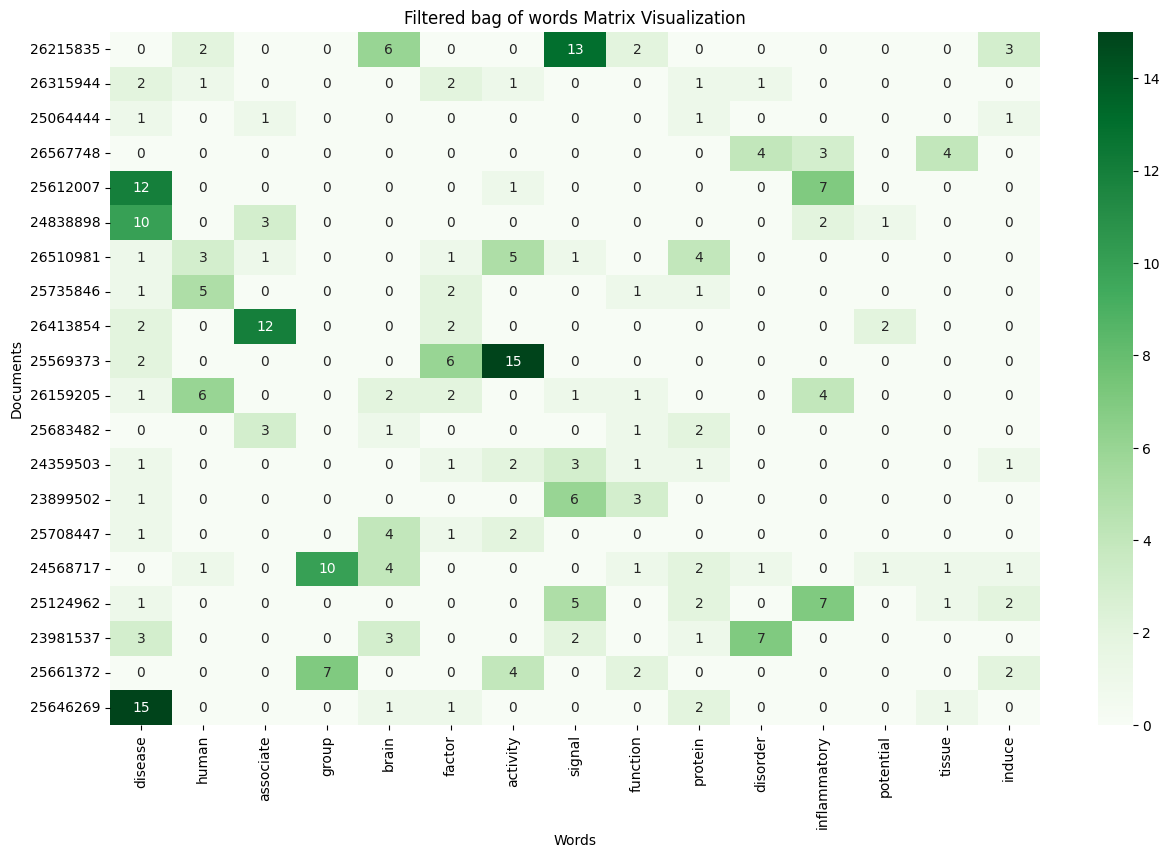

In [32]:
first_row = 0
last_row = 20
first_column = 0
last_column = 15
LBD_06_visualization.plot_bow_tfidf_matrix('Filtered bag of words', \
                                           filtered_bow_matrix[first_row:last_row,first_column:last_column], \
                                           filtered_ids_list[first_row:last_row], \
                                           filtered_word_list[first_column:last_column], as_int = True)

Generate tf-idf matrix from the list of preprocessed documents.

In [33]:
# TF-IDF representation
word_list, tfidf_matrix = LBD_03_feature_extraction.create_tfidf(prep_docs_list, ngram_size, min_df)
print('Number of terms in initial vocabulary with all ngrams: ', len(word_list))
# print(word_list)
# print(tfidf_matrix)

# Rearange (filter) the tfidf matrix according to the previously computed order from bow matrix.
tmp_filtered_word_list, tmp_filtered_tfidf_matrix = LBD_03_feature_extraction.filter_matrix_columns(
    word_list, tfidf_matrix, tmp_filter_rows, tmp_filter_columns)

word_list = tmp_filtered_word_list
tfidf_matrix = tmp_filtered_tfidf_matrix
print('Number of terms in preprocessed vocabulary after removing infrequent ngrams: ', len(word_list))

Number of terms in initial vocabulary with all ngrams:  16481
Number of terms in preprocessed vocabulary after removing infrequent ngrams:  1417


Compute margins for tf-idf matrix.

In [34]:
sum_word_tfidf = LBD_03_feature_extraction.sum_count_each_word_in_all_documents(word_list, tfidf_matrix)
max_word_tfidf = LBD_03_feature_extraction.max_tfidf_each_word_in_all_documents(word_list, tfidf_matrix)

sum_doc_tfidf = LBD_03_feature_extraction.sum_count_all_words_in_each_document(ids_list, tfidf_matrix)
max_doc_tfidf = LBD_03_feature_extraction.max_tfidf_all_words_in_each_document(ids_list, tfidf_matrix)

print('Sum of tfidf for each word: ', dict(itertools.islice(sum_word_tfidf.items(), 7)))
print('Max of tfidf for each word: ', dict(itertools.islice(max_word_tfidf.items(), 7)))

print('Sum of tfidf for each document: ', dict(itertools.islice(sum_doc_tfidf.items(), 7)))
print('Max of tfidf for each document: ', dict(itertools.islice(max_doc_tfidf.items(), 7)))

# Compute the order of rows (documents) and columns (words) in the tfidf matrix so that the most important words are in the top-left corner. 
filter_columns = LBD_02_data_preprocessing.get_index_list_of_dict1_keys(
    LBD_02_data_preprocessing.sort_dict_by_value(max_word_tfidf, reverse=True), word_list)
filter_rows = LBD_02_data_preprocessing.get_index_list_of_dict1_keys(
    LBD_02_data_preprocessing.sort_dict_by_value(max_doc_tfidf, reverse=True), ids_list) 

# Rearange (filter) the bow matrix according to the previously computed order.
filtered_ids_list, filtered_word_list, filtered_tfidf_matrix = LBD_03_feature_extraction.filter_matrix(
    ids_list, word_list, tfidf_matrix, filter_rows, filter_columns)

Sum of tfidf for each word:  {'15lipoxygenase': 0.09030741020181492, '3beta': 0.16234827060107007, '5hydroxytryptophan': 0.14047270173760598, '5lipoxygenase': 0.2700814262908027, 'abnormal': 1.526570689098185, 'accessory': 0.19959640809904247, 'acetate': 0.43126749158010613}
Max of tfidf for each word:  {'15lipoxygenase': 0.09030741020181492, '3beta': 0.16234827060107007, '5hydroxytryptophan': 0.14047270173760598, '5lipoxygenase': 0.1488302121456585, 'abnormal': 0.5271041271282054, 'accessory': 0.19959640809904247, 'acetate': 0.14372422314025773}
Sum of tfidf for each document:  {'26578392': 3.244481666601234, '26567748': 3.686681024883229, '26560688': 1.9056246053805916, '26548612': 2.0424032734969746, '26547631': 1.9015266339299668, '26527417': 2.288934741402426, '26510982': 2.6095870444010396}
Max of tfidf for each document:  {'26578392': 0.281512072185524, '26567748': 0.22610529294463674, '26560688': 0.3465254957988138, '26548612': 0.293496658622965, '26547631': 0.3517191823489922,

Visualize tf-idf matrix.

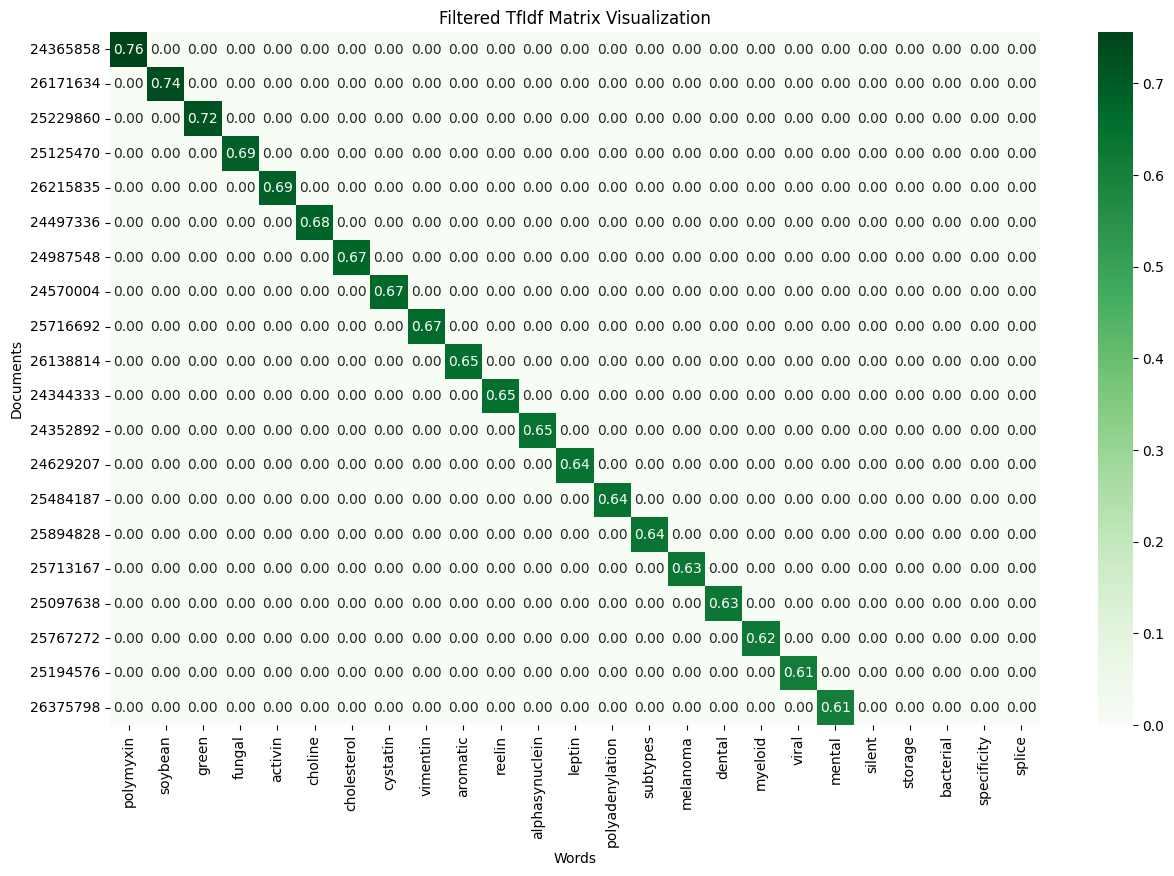

In [35]:
first_row = 0
last_row = 20
first_column = 0
last_column = 25
LBD_06_visualization.plot_bow_tfidf_matrix('Filtered TfIdf', filtered_tfidf_matrix[first_row:last_row,first_column:last_column], \
                                           filtered_ids_list[first_row:last_row], filtered_word_list[first_column:last_column], as_int = False)

Generate a list of the domain names of all the documents and a list of unique domain names.

In [36]:
domains_list = LBD_02_data_preprocessing.extract_domain_names_list(prep_docs_dict)
print('Domain names for the first few documents: ', domains_list[:7])
unique_domains_list = LBD_02_data_preprocessing.extract_unique_domain_names_list(prep_docs_dict)
print('A list of all uniques domain names in all the documents: ', unique_domains_list)

Domain names for the first few documents:  ['Alzheimer', 'Alzheimer', 'Alzheimer', 'Alzheimer', 'Alzheimer', 'Alzheimer', 'Alzheimer']
A list of all uniques domain names in all the documents:  ['Alzheimer', 'GIMB']


In [37]:
# Generate domains_bow_matrix from bow_matrix using domain_names list to add bow_matrix rows for each unique domain name into a single row
domains_bow_matrix = np.empty((0, bow_matrix.shape[1]))
no_documents_in_domain = {}
for i, domain_name in enumerate(unique_domains_list):
    domain_docs_indices = [i for i, label in enumerate(domains_list) if label == domain_name]
    no_documents_in_domain[domain_name] = len(domain_docs_indices)
    print(domain_docs_indices[:7])
    tmp = (bow_matrix[domain_docs_indices,:]).sum(axis=0)
    print(i, tmp)
    domains_bow_matrix = np.vstack((domains_bow_matrix, tmp))
    # Compute centroid for the current cluster
    #centroid_x = np.mean(pca_result[cluster_docs_indices, 0])
    #centroid_y = np.mean(pca_result[cluster_docs_indices, 1])
print(domains_bow_matrix)
print(no_documents_in_domain)

[0, 1, 2, 3, 4, 5, 6]
0 [1 2 1 ... 1 3 1]
[311, 312, 313, 314, 315, 316, 317]
1 [0 0 0 ... 0 0 0]
[[1. 2. 1. ... 1. 3. 1.]
 [0. 0. 0. ... 0. 0. 0.]]
{'Alzheimer': 311, 'GIMB': 156}


In [38]:
def cell_value_in_bow_matrix(bow_matrix, domain_name, word):
    """
    """
    line_idx = unique_domains_list.index(domain_name)
    column_idx = word_list.index(word)
    return(bow_matrix[line_idx, column_idx])

cell_value_in_bow_matrix(domains_bow_matrix, unique_domains_list[0], word_list[0])


1.0

In [39]:
print("Dictionary of words, count and max(tfidf):")

max_word_tfidf_selected = {}
sum_word_tfidf_selected = {} ### TODO from her on ...
for word in max_word_tfidf.keys():
    if sum_count_docs_containing_word[word] >= 1:
        passed = True
        for domain_name in unique_domains_list:
            if cell_value_in_bow_matrix(domains_bow_matrix, domain_name, word) <= 0:
                passed = False
        if passed:
            max_word_tfidf_selected[word] = max_word_tfidf[word]
         
import itertools
print('All the words in vocabulary: ', len(max_word_tfidf))
print('Selected bterm candidate words: ', len(max_word_tfidf_selected), ' ', dict(itertools.islice(max_word_tfidf_selected.items(), 30)))

max_word_tfidf_selected_sorted = LBD_02_data_preprocessing.sort_dict_by_value(max_word_tfidf_selected, True)

print('Sorted bterm candidate words: ', len(max_word_tfidf_selected_sorted), ' ', dict(itertools.islice(max_word_tfidf_selected_sorted.items(), 30)))
print('First and last sorted bterm word: ', list(max_word_tfidf_selected_sorted.items())[0], ' ', list(max_word_tfidf_selected_sorted.items())[-1])
print('Mean value of max tfidf values: ', np.array(list(max_word_tfidf_selected_sorted.values())).mean())

Dictionary of words, count and max(tfidf):
All the words in vocabulary:  1417
Selected bterm candidate words:  515   {'abnormal': 0.5271041271282054, 'acetylcholinesterase': 0.3277111221861566, 'acetylcholinesterase activity': 0.14175305463609214, 'acids': 0.4476243268858269, 'activation': 0.34677444336322577, 'activities': 0.45555679195426857, 'activity': 0.3709810321387587, 'activity activity': 0.19227807406554487, 'activity associate': 0.11247970317235984, 'activity disease': 0.19227807406554487, 'activity double': 0.11107552710216541, 'activity group': 0.20943385058687647, 'acute': 0.5698795912685399, 'acute acute': 0.28003045424856104, 'adhesion': 0.1065882602770022, 'adiponectin': 0.16073916760575735, 'advance': 0.5378101660668654, 'advance disease': 0.16864589445124567, 'aggregate': 0.22806299043634273, 'alanine': 0.16755684349655947, 'alcohol': 0.292442516148083, 'alpha': 0.17826323743290476, 'alphasynuclein': 0.6451923174247577, 'alternative': 0.21907413730653247, 'amine': 0.1

In [40]:
bterms_list = list(max_word_tfidf_selected_sorted.keys())
bterms_list_length = len(bterms_list)

df = pd.DataFrame({'b-term': bterms_list, 'max TF-IDF': list(max_word_tfidf_selected_sorted.values())})
df[0:25]

,b-term,max TF-IDF
0,green,0.717879
1,choline,0.680180
2,cholesterol,0.673429
3,cystatin,0.667766
4,alphasynuclein,0.645192
5,subtypes,0.636332
6,dental,0.625064
7,viral,0.611720
8,mental,0.611202
9,silent,0.599747


In [41]:
df[1201:1225]

,b-term,max TF-IDF


In [42]:
df[1050:1060]

,b-term,max TF-IDF


In [43]:
print(max_word_tfidf_selected)

{'abnormal': 0.5271041271282054, 'acetylcholinesterase': 0.3277111221861566, 'acetylcholinesterase activity': 0.14175305463609214, 'acids': 0.4476243268858269, 'activation': 0.34677444336322577, 'activities': 0.45555679195426857, 'activity': 0.3709810321387587, 'activity activity': 0.19227807406554487, 'activity associate': 0.11247970317235984, 'activity disease': 0.19227807406554487, 'activity double': 0.11107552710216541, 'activity group': 0.20943385058687647, 'acute': 0.5698795912685399, 'acute acute': 0.28003045424856104, 'adhesion': 0.1065882602770022, 'adiponectin': 0.16073916760575735, 'advance': 0.5378101660668654, 'advance disease': 0.16864589445124567, 'aggregate': 0.22806299043634273, 'alanine': 0.16755684349655947, 'alcohol': 0.292442516148083, 'alpha': 0.17826323743290476, 'alphasynuclein': 0.6451923174247577, 'alternative': 0.21907413730653247, 'amine': 0.1908934615319771, 'amino': 0.4018516596451656, 'amyloid': 0.27218031784149604, 'anemia': 0.3314781457313812, 'animal':

In [44]:
name = 'nitric'
print(name, ': ', 'position in the list of rare terms ', list(max_word_tfidf_selected_sorted.keys()).index(name), ' (', len(max_word_tfidf_selected_sorted), \
      '), max tfidf: ', format(max_word_tfidf_selected_sorted[name], '.3f'), sep='')

nitric: position in the list of rare terms 259 (515), max tfidf: 0.205


In [45]:
name = 'nitric oxide'
print(name, ': ', 'position in the list of rare terms ', list(max_word_tfidf_selected_sorted.keys()).index(name), ' (', len(max_word_tfidf_selected_sorted), \
      '), max tfidf: ', format(max_word_tfidf_selected_sorted[name], '.3f'), sep='')

nitric oxide: position in the list of rare terms 260 (515), max tfidf: 0.205


In [46]:
name = 'nitric oxide synthase'
print(name, ': ', 'position in the list of rare terms ', list(max_word_tfidf_selected_sorted.keys()).index(name), ' (', len(max_word_tfidf_selected_sorted), \
      '), max tfidf: ', format(max_word_tfidf_selected_sorted[name], '.3f'), sep='')

nitric oxide synthase: position in the list of rare terms 391 (515), max tfidf: 0.151


In [28]:
petric_bterms = ["22q112", "deletion syndrome", "asbestos", "bcl2", "bombesin", "calmodulin", "radiation", \
                 "hypothyroxinemia", "synaptic", "synaptic plasticity", "type 1 diabetes", \
                 "ulcerative colitis", "working memory", \
                 "t17p22q21"]

petric_bterms = ["22q112", "deletion", "syndrome", "asbestos", "bcl2", "bombesin", "calmodulin", "radiation", \
                 "hypothyroxinemia", "synaptic", "plasticity", "diabetes", \
                 "colitis", "work", "memory", "t17p22q21"]
nn = 0
indb = []
size = len(max_word_tfidf_selected_sorted)
for name in petric_bterms:
    if name in max_word_tfidf_selected_sorted.keys():
       nn += 1
       position = list(max_word_tfidf_selected_sorted.keys()).index(name)
       indb.append(position)
       print(name, ': ', 'position in the list of potential bterms ', list(max_word_tfidf_selected_sorted.keys()).index(name), ' (', len(max_word_tfidf_selected_sorted), \
             '), max tfidf: ', format(max_word_tfidf_selected_sorted[name], '.3f'), ' part: ', format(position/size*100, '.1f'), sep='')
    else:
        print('NOT:', name, 'NOT in the list.')   
print(nn, len(petric_bterms))
print(indb)

NOT: 22q112 NOT in the list.
NOT: deletion NOT in the list.
syndrome: position in the list of potential bterms 776 (2951), max tfidf: 0.101 part: 26.3
NOT: asbestos NOT in the list.
bcl2: position in the list of potential bterms 844 (2951), max tfidf: 0.096 part: 28.6
NOT: bombesin NOT in the list.
NOT: calmodulin NOT in the list.
NOT: radiation NOT in the list.
NOT: hypothyroxinemia NOT in the list.
synaptic: position in the list of potential bterms 1554 (2951), max tfidf: 0.068 part: 52.7
plasticity: position in the list of potential bterms 1703 (2951), max tfidf: 0.064 part: 57.7
diabetes: position in the list of potential bterms 38 (2951), max tfidf: 0.264 part: 1.3
NOT: colitis NOT in the list.
work: position in the list of potential bterms 1039 (2951), max tfidf: 0.086 part: 35.2
memory: position in the list of potential bterms 410 (2951), max tfidf: 0.135 part: 13.9
NOT: t17p22q21 NOT in the list.
7 16
[776, 844, 1554, 1703, 38, 1039, 410]


Missing and changed b-terms:

- maternal hypothyroxinemia -> hypothyroxinemia
- ulcerative colitis -> colitis
- t17p22q21 - found only in Autism documents

TODO: implement selected heuristics for bterm ranking

In [29]:
pt = []
for i in range(size):
    pt.append(0)
for i in range(len(indb)):
    for j in range(indb[i], size):
        pt[j] += 1
print(pt)
suma = 0
part = 0
for i in range(size):
    print((i+1)/size*100.0, pt[i]/len(indb)*100.0)
    part += pt[i]
    suma += len(indb)
print(part/suma*100.0)

no_all_bterm_candidates = size
no_swansons_bterms = len(indb)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

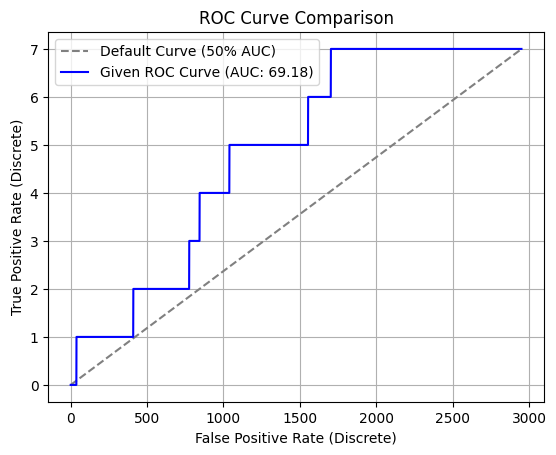

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Example ROC curve points (y-values), replace with the actual list of 120 numbers
roc_points = pt

# X-values for the ROC curve (0 to 120)
x_values = np.arange(0, no_all_bterm_candidates)

# Calculating the AUC for the given ROC curve using the trapezoidal rule
auc = np.trapz(roc_points, x_values) / (no_all_bterm_candidates*no_swansons_bterms) * 100  # Normalizing by the area of the full plot

# Plotting the default curve (50% AUC)
default_x = np.array([0, no_all_bterm_candidates])
default_y = np.array([0, no_swansons_bterms])
plt.plot(default_x, default_y, label='Default Curve (50% AUC)', linestyle='--', color='gray')

# Plotting the given ROC curve
plt.plot(x_values, roc_points, label=f'Given ROC Curve (AUC: {auc:.2f})', color='blue')

# Adding labels and legend
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate (Discrete)')
plt.ylabel('True Positive Rate (Discrete)')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()